<a href="https://colab.research.google.com/github/Alice1304/Section2_project/blob/main/0203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

유권자의 개별특성을 바탕으로 국가 선거 투표/미투표 여부 예측 

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/Alice1304/Section2_project/main/train.csv')

In [ ]:
df.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [ ]:
#결측치 확인 
df.isnull().sum()
#결측치 없음 

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [ ]:
#중복데이터 확인
df.duplicated().sum()
#중복데이터 없음

0

In [ ]:
#필요한 컬럼들만 사용하여 학습을 진행합니다

In [ ]:
df = df[['age_group','education','engnat','familysize','gender','married','race','religion','urban','voted']]
df

,age_group,education,engnat,familysize,gender,married,race,religion,urban,voted
0,30s,2,1,4,Female,3,White,Other,1,2
1,20s,4,2,3,Female,1,Asian,Hindu,3,2
2,30s,3,1,3,Male,2,White,Other,2,1
3,20s,4,2,0,Female,1,Asian,Hindu,3,1
4,20s,3,1,2,Male,2,White,Agnostic,1,1
...,...,...,...,...,...,...,...,...,...,...
45527,10s,2,1,1,Female,1,White,Jewish,3,2
45528,30s,2,1,2,Male,1,White,Atheist,1,2
45529,10s,2,1,1,Female,1,White,Christian_Other,2,1
45530,40s,4,1,2,Male,1,White,Atheist,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#평가를 위해 트레인 / 테스트 분리
train, test = train_test_split(df, random_state=2)

In [ ]:
train.shape, test.shape 

((34149, 10), (11383, 10))

In [ ]:
#타겟을 기준으로 feature / target data 분리 
target = 'voted'
features = df.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
#분류문제에서는 기준모델을 
y_train = train[target]
y_train.value_counts(normalize=True)

2    0.546458
1    0.453542
Name: voted, dtype: float64

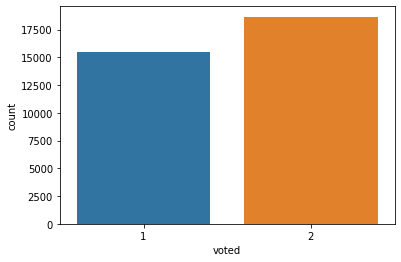

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [ ]:
major = y_train.mode()[0]

In [ ]:
y_pred = [major] * len(y_train)

In [ ]:
#기준모델 정확도 예측 
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5464581686140151


다중선형회귀

라벨인코딩/다중선형회귀사용


In [ ]:
#문자형 특성을 사용하기 위한 라벨인코딩 진행 

In [ ]:
!pip install category_encoders #카테고리 인코더 설치
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegressio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

In [ ]:
X_train_le= X_train.copy()
X_test_le = X_test.copy()

In [ ]:
#라벨인코딩 수행 
label = ['age_group', 'gender', 'race', 'religion'] 
for i in label: 
  label_encoder = LabelEncoder() 
  label_encoder.fit(X_train_le[i])
  X_train_le[i]= label_encoder.transform(X_train_le[i]) 
  label_encoder.fit(X_test_le[i])
  X_test_le[i]= label_encoder.transform(X_test_le[i])

In [ ]:
X_train_le

,age_group,education,engnat,familysize,gender,married,race,religion,urban
17484,3,3,2,4,0,1,1,6,3
16430,2,3,2,1,1,1,1,7,2
36351,1,2,1,2,0,1,5,0,2
43255,1,2,1,3,1,1,6,1,1
8061,3,3,1,2,0,2,5,0,1
...,...,...,...,...,...,...,...,...,...
44566,3,3,2,2,1,1,6,0,3
30280,1,2,1,3,1,1,5,3,3
6637,6,3,1,4,1,2,6,1,2
35343,3,3,1,2,1,1,6,10,2


In [ ]:
X_train

,age_group,education,engnat,familysize,gender,married,race,religion,urban
17484,30s,3,2,4,Female,1,Asian,Christian_Protestant,3
16430,20s,3,2,1,Male,1,Asian,Hindu,2
36351,10s,2,1,2,Female,1,Other,Agnostic,2
43255,10s,2,1,3,Male,1,White,Atheist,1
8061,30s,3,1,2,Female,2,Other,Agnostic,1
...,...,...,...,...,...,...,...,...,...
44566,30s,3,2,2,Male,1,White,Agnostic,3
30280,10s,2,1,3,Male,1,Other,Christian_Catholic,3
6637,60s,3,1,4,Male,2,White,Atheist,2
35343,30s,3,1,2,Male,1,White,Other,2


In [ ]:
#선형회귀 
linear_model = LinearRegression()

#학습
linear_model.fit(X_train_le, y_train)

#예측 
pred = linear_model.predict(X_test_le)

In [ ]:
pd.Series(linear_model.coef_, features)

age_group    -0.074983
education    -0.129591
engnat       -0.002051
familysize   -0.000857
gender       -0.007691
married      -0.008952
race         -0.031088
religion      0.002163
urban         0.017232
dtype: float64

In [ ]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, pred)

In [ ]:
display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,2.974267e+08
1,MAE,1.620595e+02
2,RMSE,1.724606e+04
3,R2,-1.200737e+09


In [ ]:
test_case = [[3, 4, 1, 10, 1, 1, 5, 7, 1]]

In [ ]:
linear_model.predict(test_case)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.28853837])

In [ ]:
#R2 회귀값이 음수로 나온 경우, 그 모델은 기준모델보다 성능이 떨어지는 모델이며, 
#임의로 테스트 데이터를 넣었을 때도 정확한 투표여부를 알기 어렵다 